In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [14]:
#Load the training set, col1 has the labels
train = np.genfromtxt("all/train4.csv", delimiter=",", skip_header=1, max_rows=10500)
x_train = train[:,1:]
x_train = x_train.astype('float32')
x_train /= 255
y_train = train[:,0]
Y = to_categorical(y_train)

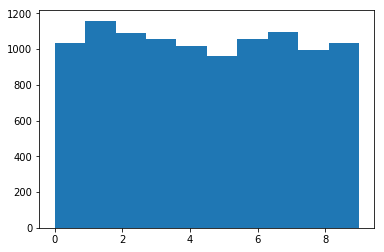

In [4]:
plt.hist(y_train, bins=10)
plt.show()

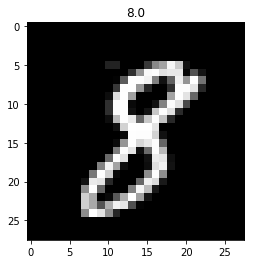

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [5]:
i = 20
plt.imshow(x_train[i].reshape(28,28),cmap='gray')
plt.title(y_train[i])
plt.show()
print(Y[20])

In [15]:
model = Sequential()
model.add(Dense(392, activation='relu', input_shape=(784,)))
model.add(Dense(196, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', \
              optimizer=RMSprop(lr=0.0007, rho=0.9, decay=1e-4),\
              metrics = ['accuracy'])

model.summary()

model.load_weights('model.h5')
model.fit(x_train, Y, epochs = 20, batch_size=128,)
model.save_weights('model.h5')
#score = model.evaluate(x_test, y_test)
#print('Test loss = '+score[0]+'\nTest accuracy = '+score[1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_14 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10499/10499 [==============================] - 1s 94us/step - loss: 0.0015 - acc: 0.9999
Epoch 2/20
10499/10499 [==============================] - 1s 74us/step - loss: 0.0015 - acc: 0.9999
Epoch 3/20
10499/10499 [==============================] - 1s 77us/step - loss: 0.0015 - acc: 0.9999
Epoch 4/20
10499/10499 [==============================] - 1s 74us/step - loss: 0.0015 - acc: 0.9999


In [28]:
test = np.genfromtxt("all/test.csv", delimiter=",", skip_header=1, max_rows=14000, dtype='float32')
test /= 255
y_hat_1 = model.predict(test)
test = np.genfromtxt("all/test.csv", delimiter=",", skip_header=14001, max_rows=14000, dtype='float32')
test /= 255
y_hat_2 = model.predict(test)

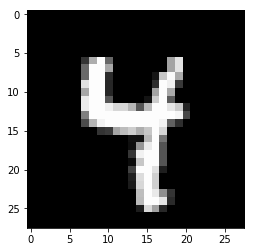

In [29]:
i = 20
plt.imshow(test[i].reshape(28,28),cmap='gray')
plt.show()

In [49]:
logits_1 = np.argmax(y_hat_1, axis=1)
logits_2 = np.argmax(y_hat_2, axis=1)
Y_hat = np.stack((np.arange(1,28001),np.concatenate((logits_1,logits_2))))
np.savetxt('a.txt', Y_hat.T, fmt='%s,%s' ,delimiter=',', header='ImageId,Label', newline='\n', comments='')